# Key questions to be asked to gain insight on data
1.) What was the change in price of the stock over time?

2.) What was the moving average of the various stocks?

3.) What was the daily return of the stock on average?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

In [ ]:
!pip install yfinance

In [ ]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download Stock Data
We download stock data using yfinance library

In [ ]:
# used yfinance library to download stock data from yahoo
import yfinance as yf
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

tickers = ['AMZN','GOOG']

# establish the start date and end date of required data
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

# Download stock data
for stock in tickers:
    globals()[stock] = yf.download(stock,start,end)

company_list = [AMZN,GOOG]
company_name = ['AMAZON','GOOGLE']

# Making a column called company name
for company,com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-07,169.139999,169.899994,164.130005,164.389999,164.389999,14034700,GOOGLE
2024-10-08,165.429993,166.100006,164.309998,165.699997,165.699997,11723900,GOOGLE
2024-10-09,164.854996,166.259995,161.119995,163.059998,163.059998,19666400,GOOGLE
2024-10-10,162.110001,164.311005,161.639999,163.179993,163.179993,12900500,GOOGLE
2024-10-11,163.330002,165.270004,162.500000,164.520004,164.520004,10946000,GOOGLE
2024-10-14,164.910004,167.619995,164.779999,166.350006,166.350006,9981800,GOOGLE
2024-10-15,167.139999,169.089996,166.050003,166.899994,166.899994,14829300,GOOGLE
2024-10-16,166.029999,167.279999,165.216003,166.740005,166.740005,9968500,GOOGLE
2024-10-17,167.380005,167.929993,164.369995,164.509995,164.509995,15113400,GOOGLE


In [ ]:
df.shape

(2516, 7)

# Descriptive analysis (Amazon)
**Mean(Average)**

Here the average of Open prices of stock and Close is similar. Which is on $141. This tells us that the stock's opening and closing prices don't differ significantly.

The stock's High price (average $143.67) and Low price (average $140.10) also don't vary widely from the Open and Close prices, indicating relatively stable trading during the day.

**Standard Deviation** (volatility)

The standard deviations for Open, Close, and other price points are approximately $31, meaning that the stock has experienced considerable fluctuations in price, though it remains within a general range.

**Range**

The min value of the Close price is $81.82, while the max value is $200.00. This indicates a large spread, suggesting significant growth in the stock's value over the period. The highest price hit during the trading days was $200.09 (high value), with low of $81.30.



In [ ]:
# descriptive analysis
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,141.941285,143.670064,140.096060,141.908327,141.908327,6.932942e+07
std,31.199841,31.293368,30.962077,31.103900,31.103900,3.380806e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,1.762600e+07
25%,115.025000,117.264997,113.494999,115.279625,115.279625,4.760188e+07
50%,150.555000,152.944496,148.045006,150.210747,150.210747,6.078300e+07
75%,167.383507,168.747749,165.198750,167.079750,167.079750,8.216422e+07
max,200.089996,201.199997,199.050003,200.000000,200.000000,3.113460e+08


In [ ]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,115.296301,116.618586,114.111621,115.377552,115.114149,2.764401e+07
std,32.182083,32.375806,31.941126,32.134363,32.087784,1.263921e+07
min,52.825500,53.566002,50.676800,52.831001,52.701576,6.936000e+06
25%,88.960001,89.890499,87.835440,88.920002,88.702166,1.922442e+07
50%,116.762501,118.395000,115.435749,117.046749,116.760006,2.462850e+07
75%,138.996693,140.008251,137.562504,138.898876,138.558601,3.213400e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,9.779860e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2019-10-21 to 2024-10-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Adj Close     2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   company_name  2516 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB


# What was the change in price of the stock over time?
The graph shows the closing prices of Amazon (AMZN) and Google (GOOG) stocks over a period from 2020 to 2025.

**Inference**: Both have expirenced upward trend with some volatility.

**Comparison:**

- **Volatility:** Google's stock price has been more volatile than Amazon's.





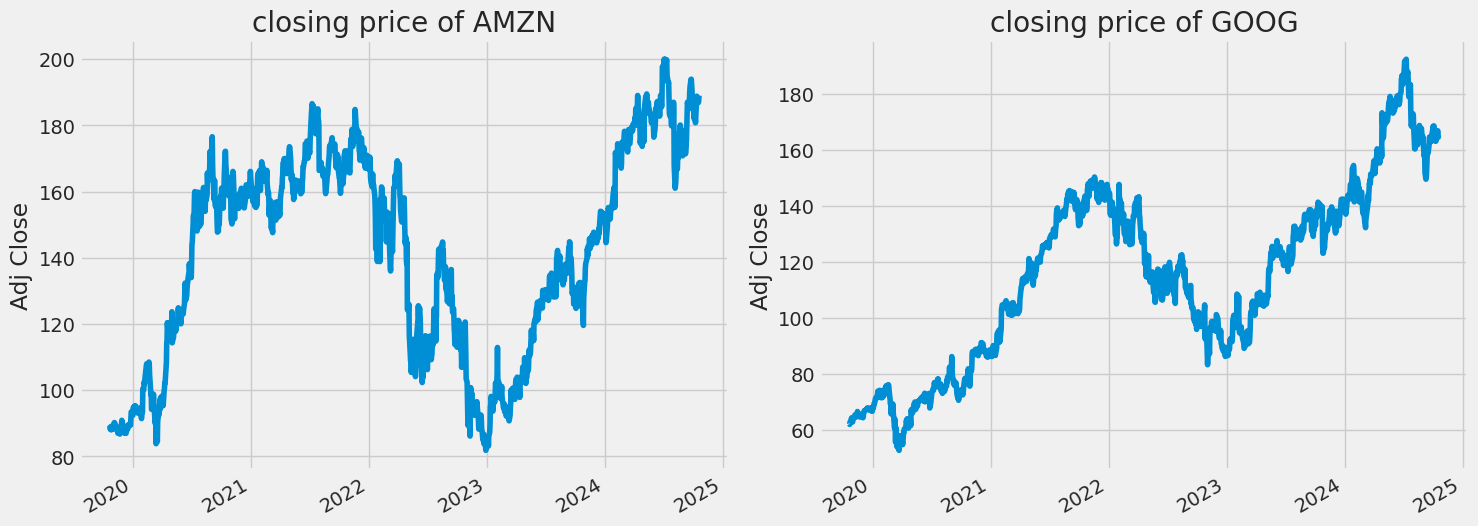

In [ ]:
# visualize closing price of stock
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25,bottom = 1.2)

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"closing price of {tickers[i-1]}")

plt.tight_layout()
plt.show()

## Visualizing Volume
**Inference**:
- **Average Volume:** Amazon generally has a higher average trading volume compared to Google.
- **Volatility:** Both stocks exhibit similar levels of volatility in terms of trading volume


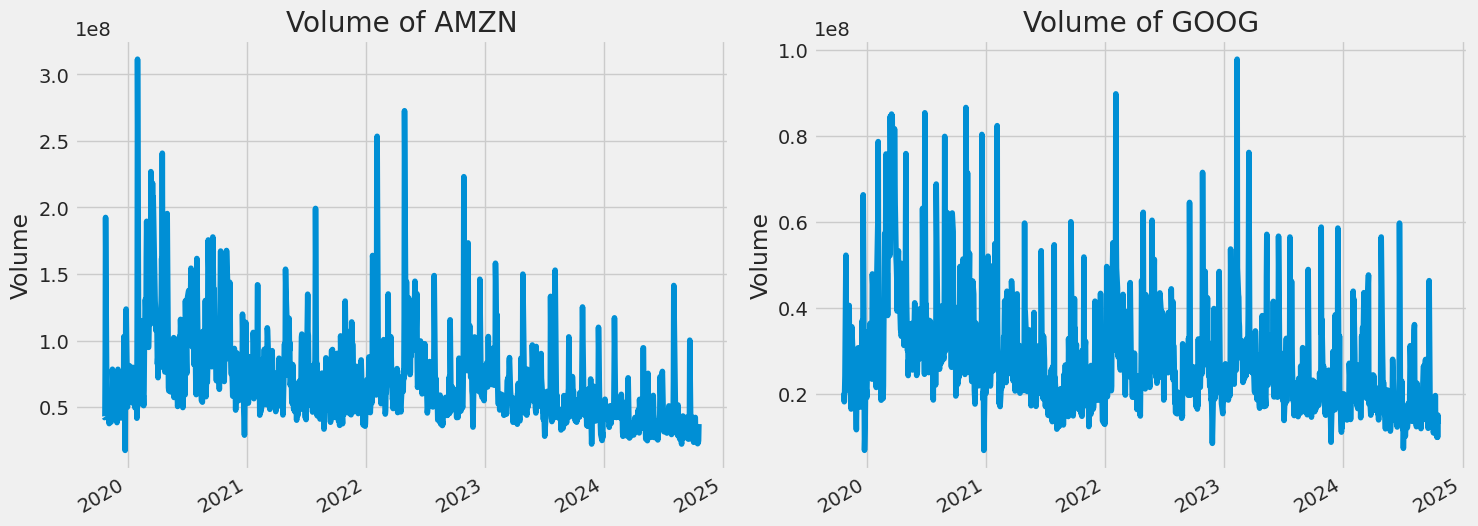

In [ ]:
# Visualize volume of stock
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25,bottom = 1.2)

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tickers[i-1]}")

plt.tight_layout()
plt.show()

# What was the moving average of the various stocks?

- **Short-term Moving Averages (10 and 20 days):** These averages provide a smoother view of the price trend compared to the daily closing price. They can help identify short-term trends and potential turning points.
- **Long-term Moving Average (50 days):** This average provides a longer-term perspective on the price trend. It can help distinguish between short-term fluctuations and longer-term trends.

### **Crossovers as Indicators**

- Moving average crossovers can indicate **potential buy or sell signals**.
    - When a **short-term moving average crosses above a longer-term one** (e.g., 10-day crosses 50-day), it can signal a potential **buy opportunity** (a bullish sign).
    - Conversely, when a **short-term moving average crosses below a longer-term one**, it could indicate a **sell opportunity** (a bearish sign).
- In the graph, we can see moments when the moving averages are tightly grouped or crossing, especially during periods of significant change in price direction (around 2022, 2023).



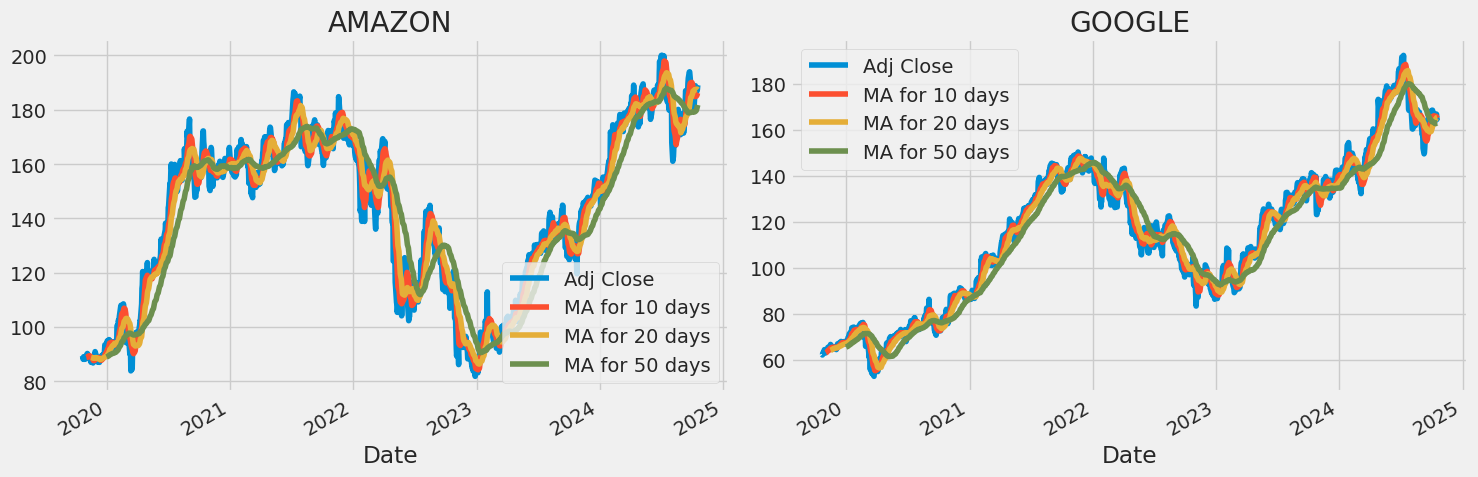

In [ ]:
# Moving averages
ma_day = [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('AMAZON')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('GOOGLE')

fig.tight_layout()

# What was the daily return of the stock on average?
### **Statistical Inferences:**

1. **Shape of the Distribution (Normality):**
    - Both distributions appear to have a bell-shaped curve, which suggests they approximate a normal distribution. This is typical for daily returns of large stocks due to the Central Limit Theorem, which states that with enough independent events (in this case, daily price movements), the outcomes (daily returns) will tend to be normally distributed.
2. **Mean (Central Tendency):**
    - Both histograms are centered around 0. This implies that, on average, the daily returns for both Amazon and Google are close to zero. This could mean that over time, the positive and negative returns balance out, leading to a stable price level.
3. **Skewness:**
    - **Amazon:** The histogram seems quite symmetric around 0, suggesting little to no skewness. This implies that the probability of positive or negative returns is almost equal.
    - **Google:** There appears to be slight negative skewness, where the left tail (negative returns) is slightly more extended than the right tail. This suggests that while small positive returns are more frequent, there are occasional larger negative returns.
4. **Kurtosis (Tails and Extreme Events):**
    - Both distributions show relatively low counts at the extremes (far left and right), indicating that extreme daily returns (both large gains and losses) are rare. The distributions appear somewhat "thin-tailed," meaning extreme events are less likely compared to a distribution with "fat tails."
    - However, Amazon’s histogram seems to have a slightly heavier tail compared to Google, indicating more frequent extreme returns.
5. **Volatility (Spread of Data):**
    - **Amazon:** The histogram has a wider spread, suggesting that Amazon’s stock experiences more variability (higher volatility) in its daily returns compared to Google. This might imply that Amazon has riskier stock movements.
    - **Google:** The narrower spread indicates that Google’s stock has less volatility. It is relatively more stable compared to Amazon's daily price fluctuations.

### **Business Analysis:**

1. **Risk-Reward Tradeoff:**
    - **Amazon:** The wider spread of returns indicates higher volatility, which usually correlates with higher risk. Investors in Amazon might experience larger swings in the stock price, which could mean higher potential rewards but also higher potential losses.
    - **Google:** The narrower spread of returns suggests that Google’s stock is relatively less volatile, making it a more stable investment. Investors might prefer Google for more consistent but smaller returns over time.



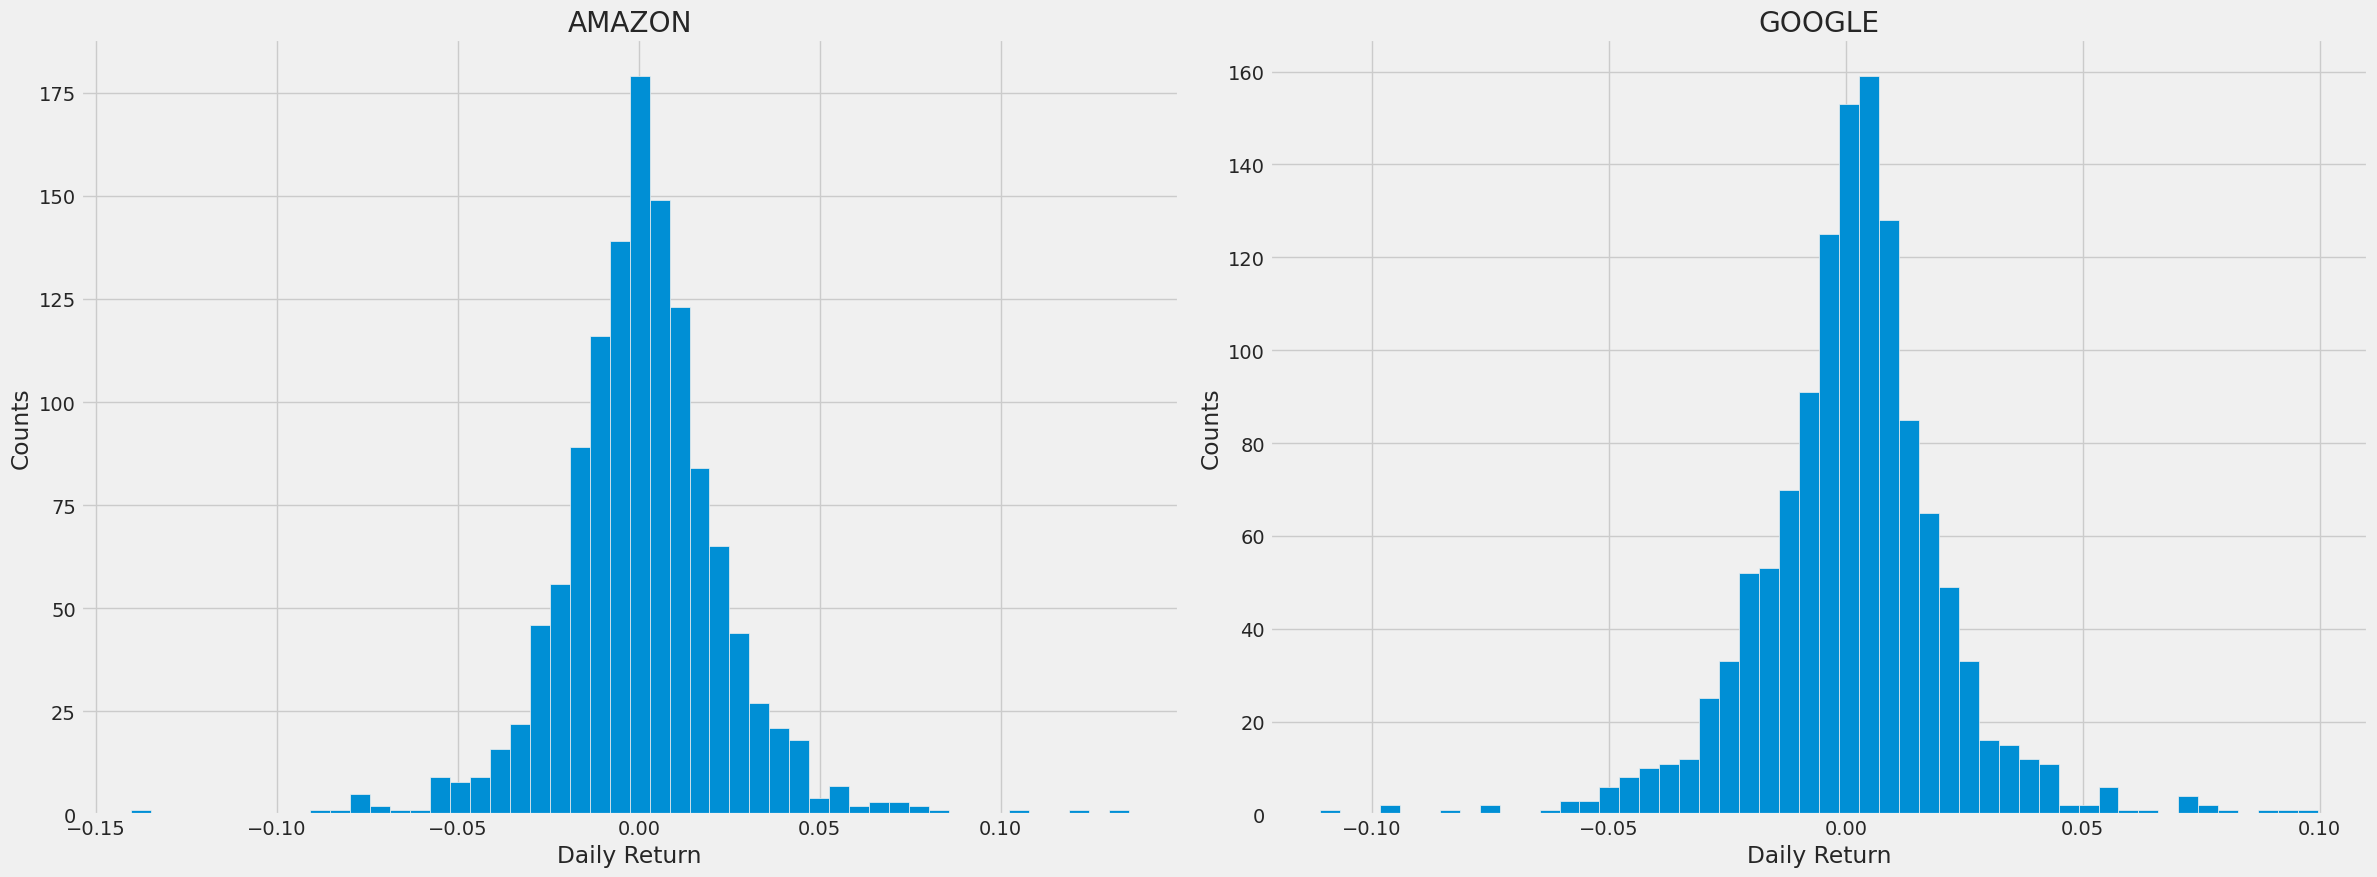

In [ ]:
# We'll use pct_change to find the percent change for each day
# This is for see daily returns
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(24, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tickers, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets.head())

[*********************100%***********************]  2 of 2 completed

Ticker                         AMZN      GOOG
Date                                         
2019-10-21 00:00:00+00:00       NaN       NaN
2019-10-22 00:00:00+00:00 -0.011161 -0.002688
2019-10-23 00:00:00+00:00 -0.002016  0.013140
2019-10-24 00:00:00+00:00  0.010561  0.001477
2019-10-25 00:00:00+00:00 -0.010922  0.003283


# What was the correlation between different stocks'?
**Scatter Plot:**

- The scatter plot shows the relationship between the daily returns of AMZN and GOOG. The points are generally clustered around a diagonal line, indicating a positive correlation between the two stocks. This means that on most days, when one stock's return is positive, the other stock's return is also likely to be positive (and vice versa).

**Histograms:**

- The histograms on the diagonal show the distribution of daily returns for each stock. Both distributions are centered around zero, indicating that most days have small returns. The distributions also have a similar shape, suggesting that the volatility of the two stocks is comparable.

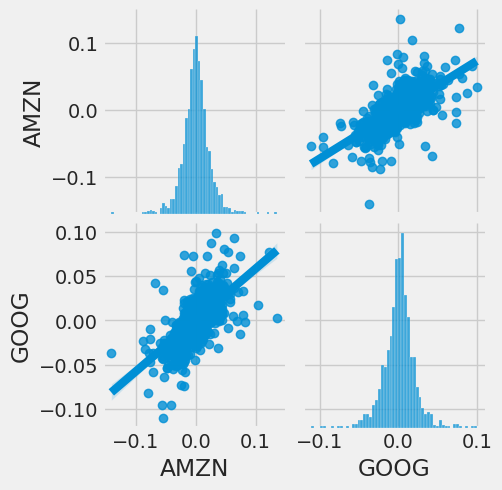

In [ ]:
# Visualize correlation through scatter plot
sns.pairplot(tech_rets, kind='reg')
plt.show()

Text(0.5, 1.0, 'Correlation of stock closing price')

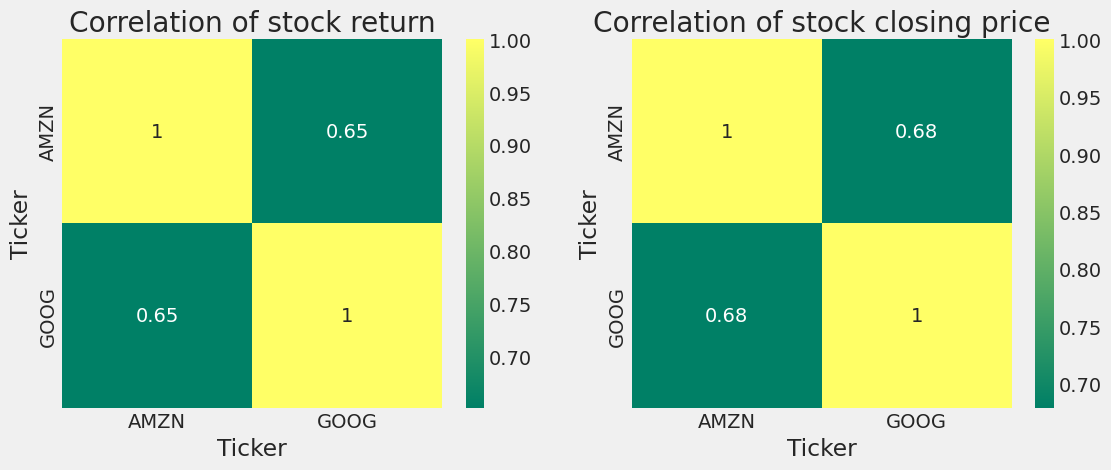

In [ ]:
# visualize correlation numerically
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# How much value do we put at risk by investing in a particular stock?
- **Amazon:** Has a higher risk and a lower expected return (as indicated by its position on the x-axis).
- **Google:** Has a lower risk and a higher expected return.

This suggests that Google might be a more attractive investment option compared to Amazon, as it offers a higher potential return with a lower level of risk.

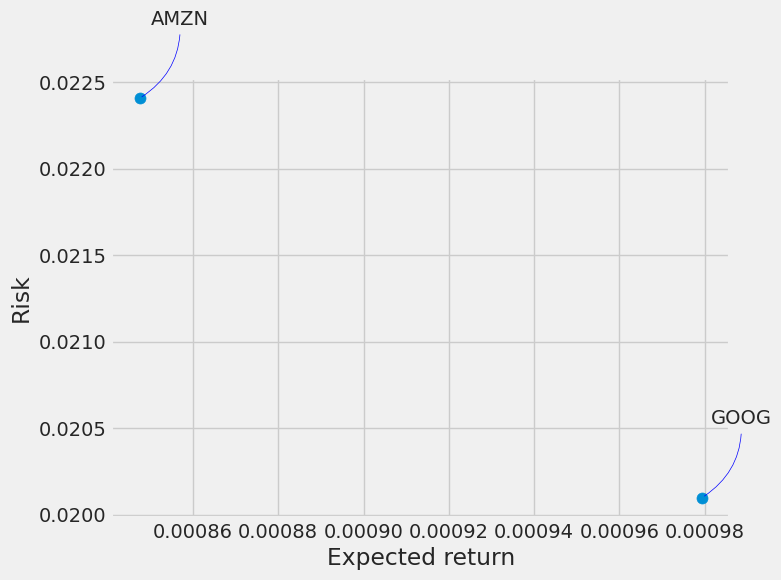

In [ ]:
# Analyse risk
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.tight_layout()